# Team 5 Project:-

In [1]:
# libraries used
import pandas as pd
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from sklearn.preprocessing import LabelEncoder
from scipy.stats import shapiro
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels.stats.multicomp as mc
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
import statsmodels.api as sm

In [2]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [10,10]

# The Dataset used: Walmart Sales
##### Region : Walmart outlet location
##### Item_Type : The category to which the item belongs to
##### Sales_Channel : The medium through which the item was sold
##### Order_ID : Unique ID for each sale made
##### Unit_Price : The price at which a single unit of item is sold
##### Unit_Cost : Cost price of a particular item
##### Total_Revenue : The amount generated upon each sale
##### Total_Cost : The Cost Price of a particular sale
##### Total_Profit : Profits made by Walmart per sale
##### Units_Sold : The number of units sold of a particular item per sale

In [3]:
#Loading the datadset 
data=pd.read_csv('Walmart Sales.csv')
data.head()

Region   Item_Type Sales_Channel   Order_ID  Unit_Price  Unit_Cost  \
0         Africa   Cosmetics       Offline  686800706      437.20     263.33   
1  North America  Vegetables        Online  185941302      154.06      90.93   
2         Africa   Baby Food       Offline  246222341      255.28     159.42   
3           Asia      Cereal       Offline  161442649      205.70     117.11   
4         Africa      Fruits       Offline  645713555        9.33       6.92   

   Total_Revenue  Total_Cost  Total_Profit  Units_Sold  
0     3692591.20  2224085.18    1468506.02        8446  
1      464953.08   274426.74     190526.34        3018  
2      387259.76   241840.14     145419.62        1517  
3      683335.40   389039.42     294295.98        3322  
4       91853.85    68127.40      23726.45        9845

# Exploratory Data Analysis of Walmart Sales:

In [4]:
# Shape of data
data.shape

(1000, 10)

### Conclusion: The Data consists of 1000 records and 10 attributes

In [5]:
# Basic info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         1000 non-null   object 
 1   Item_Type      1000 non-null   object 
 2   Sales_Channel  1000 non-null   object 
 3   Order_ID       1000 non-null   int64  
 4   Unit_Price     1000 non-null   float64
 5   Unit_Cost      1000 non-null   float64
 6   Total_Revenue  1000 non-null   float64
 7   Total_Cost     1000 non-null   float64
 8   Total_Profit   1000 non-null   float64
 9   Units_Sold     1000 non-null   int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 78.2+ KB


### Conclusion: From the 10 attributes : 3 are object type, 2 are integer type and the remaining 5 are float type

In [6]:
# Check for null values
data.isna().sum()

Region           0
Item_Type        0
Sales_Channel    0
Order_ID         0
Unit_Price       0
Unit_Cost        0
Total_Revenue    0
Total_Cost       0
Total_Profit     0
Units_Sold       0
dtype: int64

### Conclusion: There are no null values present in any attributes

In [7]:
# Descriptive statistics of data
data.describe(include='all').T

count unique        top freq         mean          std  \
Region         1000      6     Africa  400          NaN          NaN   
Item_Type      1000     12  Beverages  101          NaN          NaN   
Sales_Channel  1000      2    Offline  520          NaN          NaN   
Order_ID       1000    NaN        NaN  NaN  5.49681e+08  2.57133e+08   
Unit_Price     1000    NaN        NaN  NaN      262.107      216.021   
Unit_Cost      1000    NaN        NaN  NaN      184.965      175.289   
Total_Revenue  1000    NaN        NaN  NaN  1.32732e+06  1.48651e+06   
Total_Cost     1000    NaN        NaN  NaN       936119  1.16257e+06   
Total_Profit   1000    NaN        NaN  NaN       391203       383640   
Units_Sold     1000    NaN        NaN  NaN      5053.99      2901.38   

                       min          25%         50%          75%          max  
Region                 NaN          NaN         NaN          NaN          NaN  
Item_Type              NaN          NaN         NaN          NaN          NaN  
Sales_Channel          NaN          NaN         NaN          NaN          NaN  
Order_ID       1.02928e+08  3.28074e+08  5.5661e+08  7.69694e+08   9.9553e+08  
Unit_Price            9.33        81.73      154.06       421.89       668.27  
Unit_Cost             6.92        56.67       97.44       263.33       524.96  
Total_Revenue      2043.25       281192      754939   1.7335e+06  6.61721e+06  
Total_Cost         1416.75       164932      464726  1.14175e+06  5.20498e+06  
Total_Profit        532.61      98376.1      277226       548457  1.72618e+06  
Units_Sold              13      2420.25        5184      7536.75         9998

### Conclusion: The products are sold at a reasonable price. 75% of the units are sold at 421 or less
### Units are sold through two different mediums/sales channel
### There are 12 different item types sold across 6 different Regions
### Walmart has ensured that their profit per sale is greater than 532.

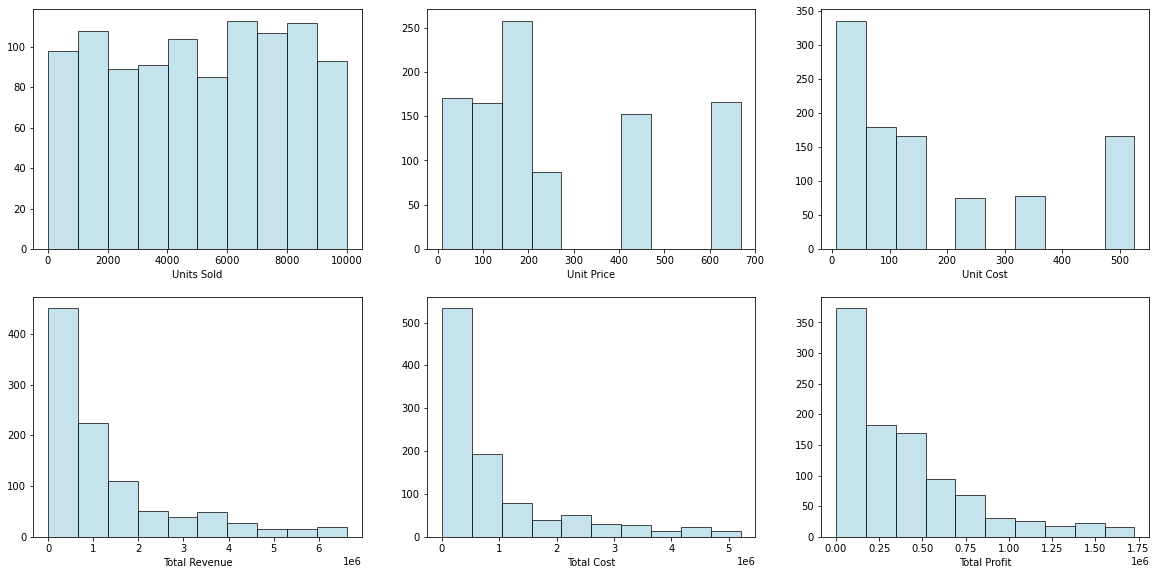

In [8]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data.Units_Sold, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Units Sold')

plt.subplot(3,3,2)
plt.hist(data['Unit_Price'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Unit Price')

plt.subplot(3,3,3)
plt.hist(data['Unit_Cost'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Unit Cost')

plt.subplot(3,3,4)
plt.hist(data['Total_Revenue'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Total Revenue')

plt.subplot(3,3,5)
plt.hist(data['Total_Cost'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Total Cost')

plt.subplot(3,3,6)
plt.hist(data['Total_Profit'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Total Profit')

plt.show()

### Conclusion: Units sold seem to be uniformly distributed
### Unit Price and Unit Cost seem to be moderately positively skewed
### Total Revenue, Total Cost and Total Profit seem to be highly positively skewed

In [9]:
def central_limit_theorem(data,n_samples = 1000, sample_size = 500):
    min_value = 0  # minimum index of the data
    max_value = data.count()  # maximum index of the data
    b = {}
    for i in range(n_samples):
        x = np.unique(np.random.randint(min_value, max_value, size = sample_size)) # set of random numbers with a specific size
        b[i] = data[x].mean()   # mean of each sample
    c = pd.DataFrame()
    c['sample'] = b.keys()  # sample number 
    c['Mean'] = b.values()  # mean of that particular sample
    plt.figure(figsize= (15,5))

    plt.subplot(1,2,2)
    sns.distplot(c.Mean)
    plt.title(f"Sampling Distribution. \n \u03bc = {round(c.Mean.mean(), 3)} & SE = {round(c.Mean.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')

    plt.subplot(1,2,1)
    sns.distplot(data)
    plt.title(f"Population Distribution. \n \u03bc = {round(data.mean(), 3)} & \u03C3 = {round(data.std(),3)}")
    plt.xlabel('data')
    plt.ylabel('freq')

    plt.show()

In [10]:
a2=data['Unit_Cost']
a3=data['Unit_Price']
a4=data['Total_Revenue']
a5=data['Total_Profit']
a6=data['Total_Cost']

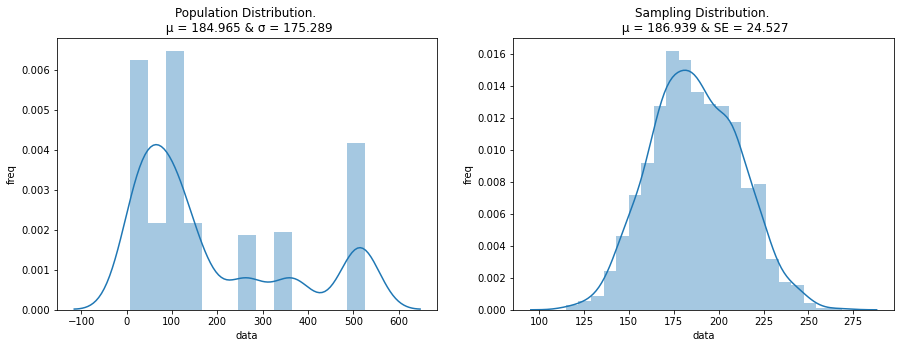

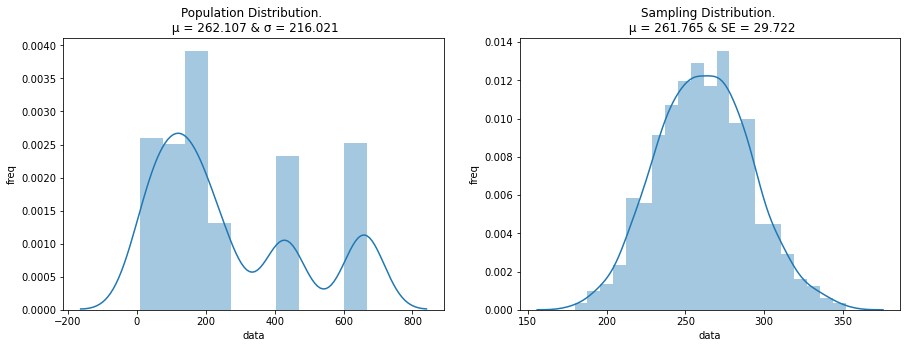

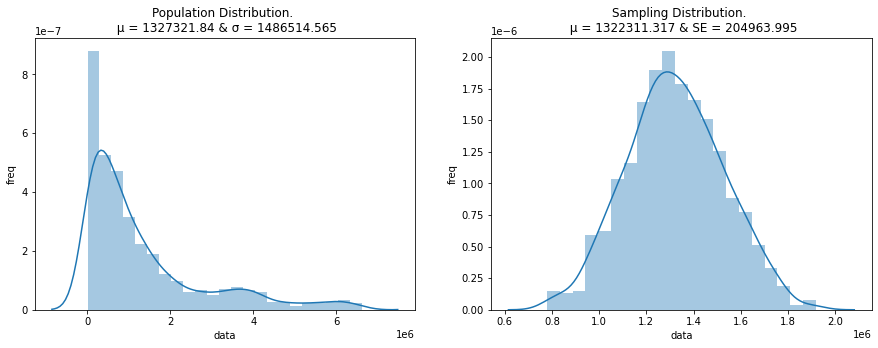

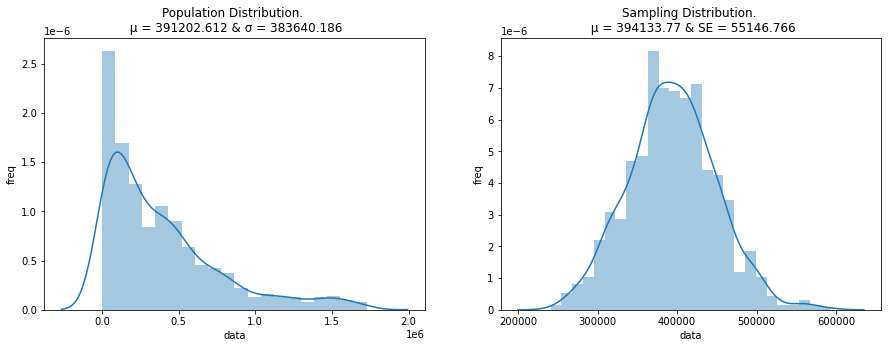

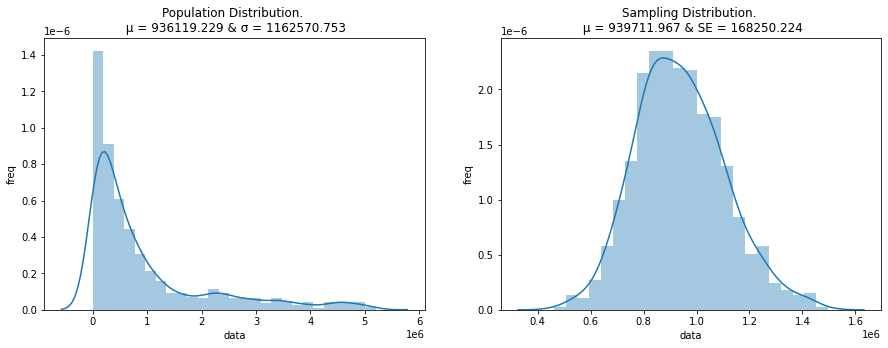

In [11]:
central_limit_theorem(a2,n_samples = 1000, sample_size = 50)
central_limit_theorem(a3,n_samples = 1000, sample_size = 50)
central_limit_theorem(a4,n_samples = 1000, sample_size = 50)
central_limit_theorem(a5,n_samples = 1000, sample_size = 50)
central_limit_theorem(a6,n_samples = 1000, sample_size = 50)

In [12]:
#Skewness of the data
data_skew= pd.DataFrame({'Skewness' : [stats.skew(data['Units_Sold']),stats.skew(data['Unit_Price']),
                                      stats.skew(data['Unit_Cost']),stats.skew(data['Total_Revenue']),
                                      stats.skew(data['Total_Cost']),stats.skew(data['Total_Profit'])]},
                        index=['Units sold','Unit Price','Unit Cost','Total Revenue','Total Cost','Total Profit']) 
data_skew

Skewness
Units sold    -0.051140
Unit Price     0.790847
Unit Cost      0.946608
Total Revenue  1.629089
Total Cost     1.795753
Total Profit   1.403269

### The skewness of Units sold is close to 0 hence there is hardly any skew
### Total Revenue, Total Cost and Total Profit are highly skewed

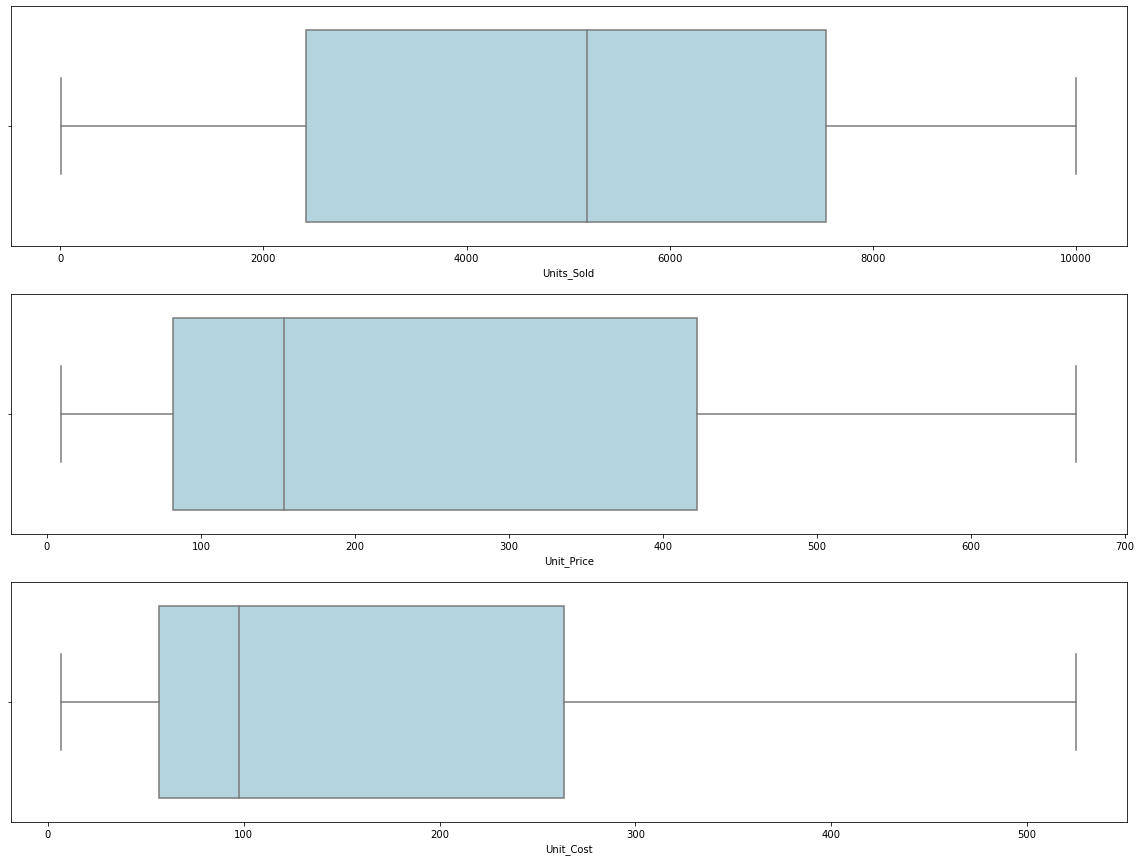

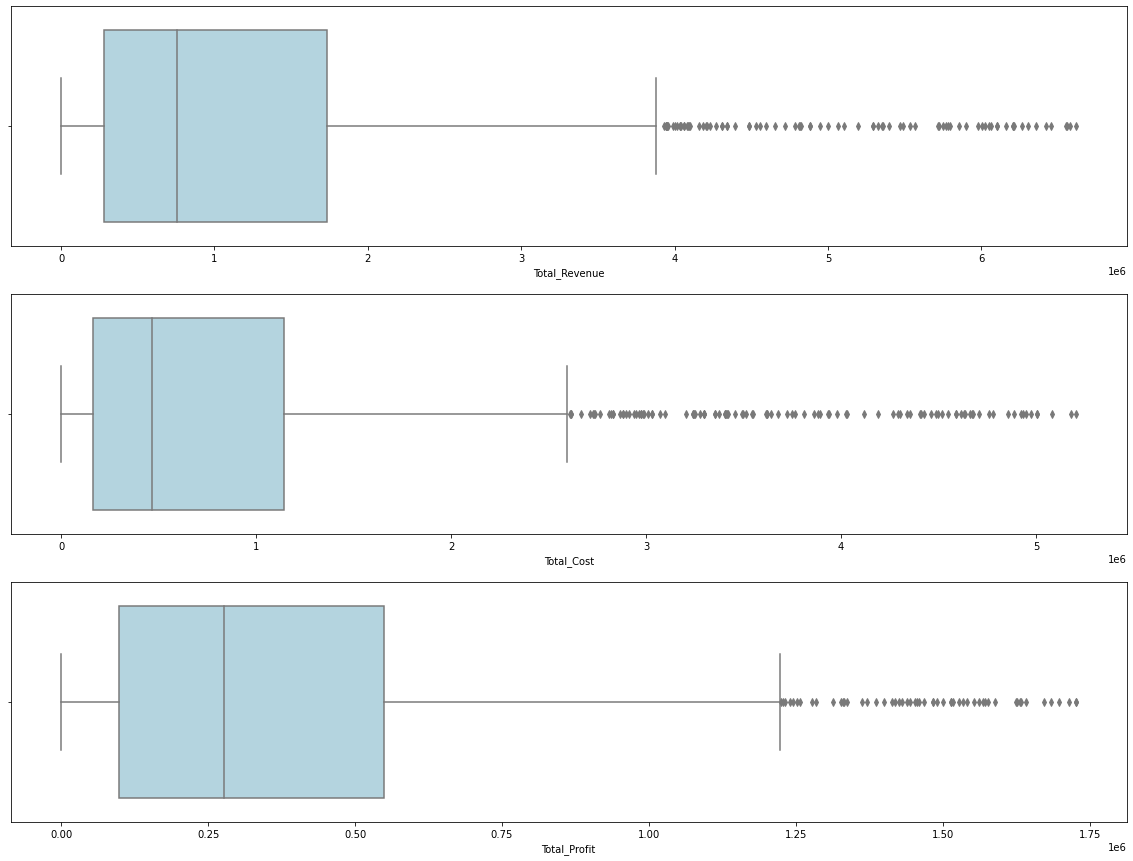

In [13]:
plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(data['Units_Sold'], color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(data['Unit_Price'], color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(data['Unit_Cost'], color='lightblue')

plt.figure(figsize= (20,15))
plt.subplot(3,1,1)
sns.boxplot(data['Total_Revenue'], color='lightblue')

plt.subplot(3,1,2)
sns.boxplot(data['Total_Cost'], color='lightblue')

plt.subplot(3,1,3)
sns.boxplot(data['Total_Profit'], color='lightblue')

plt.show()

### Unit Cost, Units Sold and Unit Price have no outliers
### Total Revenue, Total Cost and Total Profit have many outliers

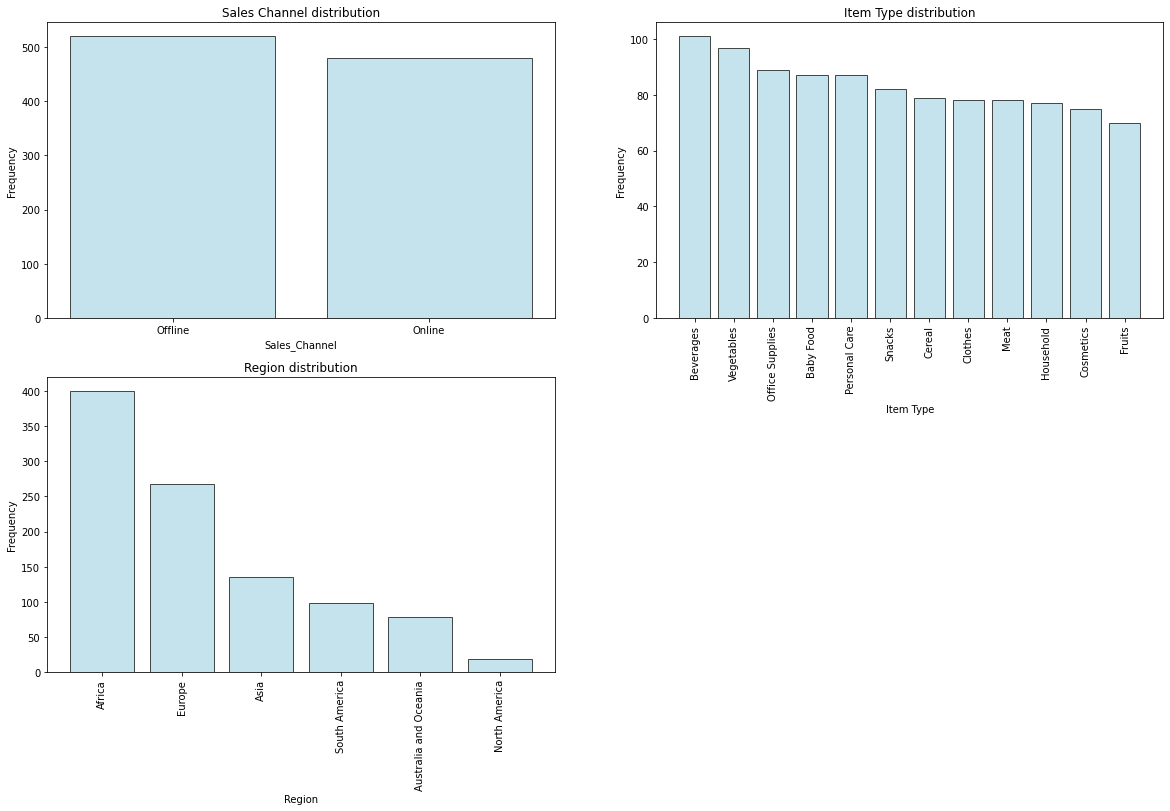

In [14]:
plt.figure(figsize=(20,25))

x2 = data['Sales_Channel'].value_counts().index    #Values for x-axis
y2 = [data['Sales_Channel'].value_counts()[i] for i in x2]   # Count of each class on y-axis

plt.subplot(4,2,1)
plt.bar(x2,y2, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Sales_Channel')
plt.ylabel('Frequency')
plt.title('Sales Channel distribution')

x = data['Region'].value_counts().index    #Values for x-axis
y = [data['Region'].value_counts()[i] for i in x]   # Count of each class on y-axis

plt.subplot(4,2,3)
plt.bar(x,y, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Region')
plt.ylabel('Frequency')
plt.title('Region distribution')
plt.xticks(rotation = 90)

x1 = data['Item_Type'].value_counts().index    #Values for x-axis
y1 = [data['Item_Type'].value_counts()[i] for i in x1]   # Count of each class on y-axis

plt.subplot(4,2,2)
plt.bar(x1,y1, align='center',color = 'lightblue',edgecolor = 'black',alpha = 0.7)  #plot a bar chart
plt.xlabel('Item Type')
plt.ylabel('Frequency')
plt.title('Item Type distribution')
plt.xticks(rotation = 90)

plt.show()


### The sales are evenly distributed among the two sales channels
### Most of the sales are across Europe and Sub-Saharan Africa
### Beverages are the highest sold item type whereas fruits be the least sold item type

# Hypothesis Testing

## Chi-Square (Test for Goodness of Fit)

### Walmart is spread across 6 different regions across the globe. The CEO of Walmart, Doug McMillon claims that 15% of their total sales are in Asia , 10% in Australia and Oceania, 40% in Africa,25% in Europe,8% in South America and the remaining in North America. Check their claim using 95% confidence level.

In [15]:
#State Null and Alternate Hypothesis

print('Ho : The sales distribution is as per the given ratios by the CEO')
print('Ha : The sales distribution is different than the ratios given by the CEO')

#Decide Significance level

alpha = 0.05

#Identify Test Statistic

n = data['Region'].nunique()
obser_val = np.array(data.groupby('Region').count()['Order_ID'])

total = sum(obser_val)

afr = total * 0.40
asia = total * 0.15
aus = total * 0.05
eur = total * 0.25
n_am = total * 0.02
s_am = total * 0.08

expect_val = (np.array([afr,asia,aus,eur,n_am,s_am]))

#Calculate p-value or chi-square statistic

stat, p_value = chisquare(f_obs = obser_val, f_exp = expect_val)

print('Test statistic:', stat)
print('p-value:', p_value)

#Decide whether to accept or reject Null hypothesis

print('p value is less than 0.05 hence we reject the null hypothesis.')
print('We conclude that the sales distribution is not as the CEO claims it to be')

Ho : The sales distribution is as per the given ratios by the CEO
Ha : The sales distribution is different than the ratios given by the CEO
Test statistic: 23.845166666666664
p-value: 0.00023250243384415455
p value is less than 0.05 hence we reject the null hypothesis.
We conclude that the sales distribution is not as the CEO claims it to be


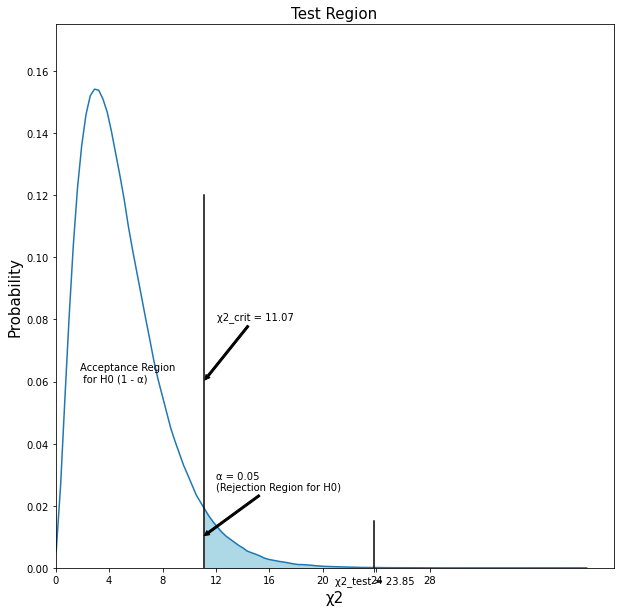

In [16]:
# consider a random variable 'X' that follows a chi-square distribution 
# pass the degrees of freedom to the parameter 'df' 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.chi2.rvs(df = n - 1, size = 1000000, random_state = 4)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.175)

# set the left side limit for x-axis
plt.xlim(0)

# use 'stats.chi2.isf()' to calculate the critical value for alpha = 0.1
# pass the value of 'alpha' to the parameter 'q'
# pass the degrees of freedom to the parameter 'df' 
chi2 = stats.chi2.isf(alpha, df = n - 1)

# plot a vertical line at χ2-value
x, y = [chi2, chi2], [0, 0.12]
plt.plot(x, y, color = 'black')

# plot a vertical line at χ2 test value
x, y = [stat, stat], [0, 0.015]
plt.plot(x, y, color = 'black')

# add the color to the right of the χ2-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical χ2-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= chi2], y1[x1 >= chi2], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (11, 0.01), xytext = (12, 0.025), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'χ2_crit = '+ str(round(chi2,2)), xy = (chi2, 0.06), xytext = (chi2+1, 0.08), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 1.8, y = 0.06, s = 'Acceptance Region \n for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [0, 4, 8, 12, 16, 20, 24, 28, round(stat,2)], 
           labels = [0, 4, 8, 12, 16, 20, 24, 28, 'χ2_test = '+str(round(stat,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('χ2', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Test Region', fontsize = 15)

# display the plot
plt.show()

## Chi-Square (Test for Independence)

# The CEO of Walmart , Doug McMillon would like to check if the platform for sales of products has any dependency with the Region in which a Walmartt outlet is established.

In [159]:
#State Null and Alternate Hypothesis

print('Ho : There is no difference in online and offline sales across different regions')
print('Ha : There is a significant difference in online and offline sales across different regions')

#Decide Significance level

alpha = 0.05

#Identify the Test Statistic

table = pd.crosstab(data['Region'], data['Sales_Channel'])

observed_value = table.values

#Calculate p-value or chi-square statistic+

test_stat, p, dof, expected_value = chi2_contingency(observed = observed_value, correction = False)

print("Test statistic:", test_stat)
print("p-value:", p)
print("Degrees of freedom:", dof)
print("Expected values:", expected_value)

#Decide whether to accept or reject Null hypothesis

print('Since the p value is greater than 0.05 , we fail to reject the hypothesis')
print('We conclude that medium of sales of different products has nothing to do with the region')

Ho : There is no difference in online and offline sales across different regions
Ha : There is a significant difference in online and offline sales across different regions
Test statistic: 7.139763070570783
p-value: 0.21045174681784953
Degrees of freedom: 5
Expected values: [[208.   192.  ]
 [ 70.72  65.28]
 [ 41.08  37.92]
 [138.84 128.16]
 [  9.88   9.12]
 [ 51.48  47.52]]
Since the p value is greater than 0.05 , we fail to reject the hypothesis
We conclude that medium of sales of different products has nothing to do with the region


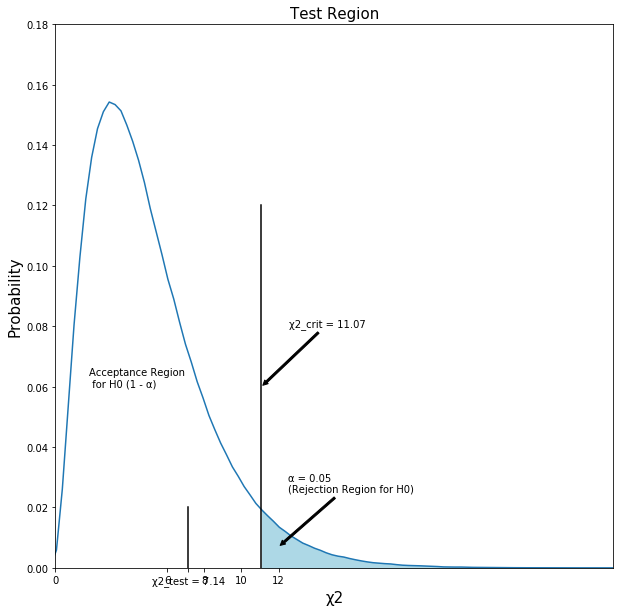

In [160]:
# consider a random variable 'X' that follows a chi-square distribution 
# pass the degrees of freedom to the parameter 'df' 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.chi2.rvs(df = dof, size = 1000000, random_state = 12)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.18)

# set the limit for x-axis
plt.xlim(0, 30)

# use 'stats.chi2.isf()' to calculate the critical value for alpha = 0.05
# pass the value of 'alpha' to the parameter 'q'
# pass the degrees of freedom to the parameter 'df' 
chi2 = stats.chi2.isf(q = alpha, df = dof)

# plot a vertical line at χ2-value
x, y = [chi2, chi2], [0, 0.12]
plt.plot(x, y, color = 'black')

# plot a vertical line at χ2 test value
x, y = [test_stat, test_stat], [0, 0.02]
plt.plot(x, y, color = 'black')

# add the color to the right of the χ2-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical χ2-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= chi2], y1[x1 >= chi2], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (12, 0.007), xytext = (12.5, 0.025), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'χ2_crit = '+ str(round(chi2,2)), xy = (chi2, 0.06), xytext = (chi2+1.5, 0.08), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 1.8, y = 0.06, s = 'Acceptance Region \n for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [0, 6, 8, 10, 12, round(test_stat,2)], 
           labels = [0, 6, 8, 10, 12, 'χ2_test = '+str(round(test_stat,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('χ2', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Test Region', fontsize = 15)

# display the plot
plt.show()

## One-way ANOVA

### Check whether the total revenue generated for all regions is the same or not. Is it possible to identify which regions have a different total profit generated

In [161]:
#State Null and Alternate Hypothesis

print('Ho: The average of total revenue across all regions is the same')
print('Ha: Atleast one region has a different average total revenue')

#Decide Significance level

alpha = 0.05

#Check normality of the total revenue in all regions

stat, p_value = stats.shapiro(data['Total_Revenue'])

print('p-value:', p_value)

Ho: The average of total revenue across all regions is the same
Ha: Atleast one region has a different average total revenue
p-value: 6.823823225872594e-34


In [162]:
print('Since the p value was less than 0.05, the data is not normally distributed hence we will use Kruskals test')

#Identify Test Statistic

n = data['Region'].nunique()
afr = data[data['Region'] == 'Africa']['Total_Revenue']
asia = data[data['Region'] == 'Asia']['Total_Revenue']
eur = data[data['Region'] == 'Europe']['Total_Revenue']
aus = data[data['Region'] == 'Australia and Oceania']['Total_Revenue']
n_am = data[data['Region'] == 'North America']['Total_Revenue']
s_am = data[data['Region'] == 'South America']['Total_Revenue']

test_stat, p_val = stats.kruskal(afr,asia,eur,aus,n_am,s_am)

print('Test statistic:', test_stat)
print('p-value:', p_val)

#Calculate Critical Value

chi2_val = np.abs(round(stats.chi2.isf(0.05, df = 5), 4))

print('Critical value for chi-square test:', chi2_val)

# Decide whether to accept or reject Null Hypothesis

print('Since the p value is greater than 0.05 and test statistic is less than critical value, we fail to reject the null hypothesis')
print('We can conclude that the total revenue generated across all regions is the same')

Since the p value was less than 0.05, the data is not normally distributed hence we will use Kruskals test
Test statistic: 0.5438313310216444
p-value: 0.9904303362189925
Critical value for chi-square test: 11.0705
Since the p value is greater than 0.05 and test statistic is less than critical value, we fail to reject the null hypothesis
We can conclude that the total revenue generated across all regions is the same


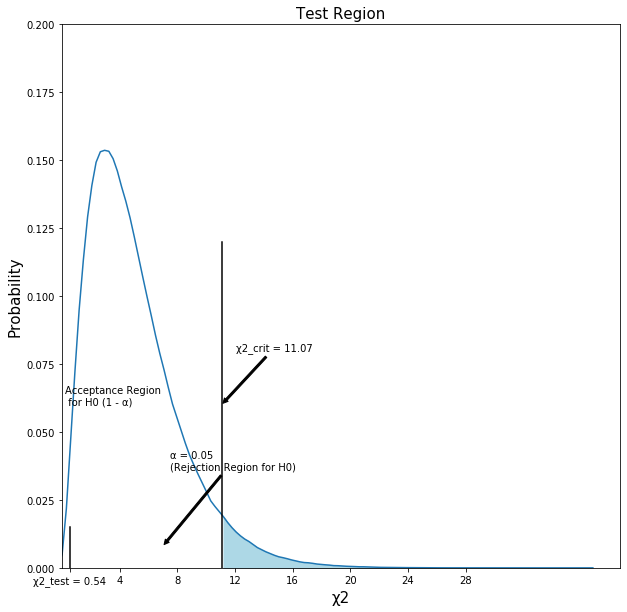

In [163]:
# consider a random variable 'X' that follows a chi-square distribution 
# pass the degrees of freedom to the parameter 'df' 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.chi2.rvs(df = n-1, size = 1000000, random_state = 10)

# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.2)

# set the left side limit for x-axis
plt.xlim(0)

# use 'stats.chi2.isf()' to calculate the critical value for alpha = 0.05
# pass the value of 'alpha' to the parameter 'q'
# pass the degrees of freedom to the parameter 'df' 
chi2 = stats.chi2.isf(q = alpha, df = n-1)

# plot a vertical line at χ2-value
x, y = [chi2, chi2], [0, 0.12]
plt.plot(x, y, color = 'black')

# plot a vertical line at χ2 test value
x, y = [test_stat, test_stat], [0, 0.015]
plt.plot(x, y, color = 'black')

# add the color to the right of the χ2-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical χ2-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= chi2], y1[x1 >= chi2], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (7, 0.008), xytext = (7.5, 0.036), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'χ2_crit = '+ str(round(chi2,2)), xy = (chi2, 0.06), xytext = (chi2+1, 0.08), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = 0.2, y = 0.06, s = 'Acceptance Region \n for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [4, 8, 12, 16, 20, 24, 28, round(test_stat,2)], 
           labels = [4, 8, 12, 16, 20, 24, 28, 'χ2_test = '+str(round(test_stat,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('χ2', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Test Region', fontsize = 15)

# display the plot
plt.show()

## One Sample t Test

### The manager of Walmart Europe claims that average profits made on the sales of snacks is greater than 265000. Test his claim with 95% confidence.

In [164]:
#State Null and Alternate Hypothesis

print('Ho : mu <= 265000')
print('Ha : mu > 265000')
print('Right Tailed Test')

# Decide on Significance level

alpha = 0.05

#Check normality of sales of snacks in Europe

eur = data[(data['Region'] == 'Europe') & (data['Item_Type'] == 'Snacks')]['Total_Profit']
n = eur.count()

stat, p_value = shapiro(eur)

print('Test statistic:', stat)
print('P-Value:', p_value)
print('Sample Size: ',n)

Ho : mu <= 265000
Ha : mu > 265000
Right Tailed Test
Test statistic: 0.9279345870018005
P-Value: 0.0778791531920433
Sample Size:  25


In [165]:
print('The p value of the sample is greater than 0.05 , we can say that the data is normally distributed and we can use t test')

# Compute Test Statistic

x_bar = data[(data['Region'] == 'Europe') & (data['Item_Type'] == 'Snacks')]['Total_Profit'].mean()
s = data[(data['Region'] == 'Europe') & (data['Item_Type'] == 'Snacks')]['Total_Profit'].std()
n = data[(data['Region'] == 'Europe') & (data['Item_Type'] == 'Snacks')]['Total_Profit'].count()
mu = 265000

t_stat = (x_bar - mu) / (s / np.sqrt(n))

print("t-score:", t_stat)

# Calculate t critical value

t_crit = round(stats.t.isf(alpha, df = n - 1), 2)

print('Critical value for one-tailed t-test:', t_crit)

# Calculate p_value

t_stat, p_val = stats.ttest_1samp(a = eur, popmean = mu)

# divide the p-value by 2 since one tail test

req_p_val = p_val/2

print('p-value:', req_p_val)

# Decide whether to accept or reject Null Hypothesis

print('Since the p value is greater than 0.05 and t-score is less than t critical, we fail to reject the Null Hypothesis')
print('We can conclude that the average profits made on sales of snacks in Europe is less than or equal to 265000')

The p value of the sample is greater than 0.05 , we can say that the data is normally distributed and we can use t test
t-score: 0.3604022510140147
Critical value for one-tailed t-test: 1.71
p-value: 0.3608494576995616
Since the p value is greater than 0.05 and t-score is less than t critical, we fail to reject the Null Hypothesis
We can conclude that the average profits made on sales of snacks in Europe is less than or equal to 265000


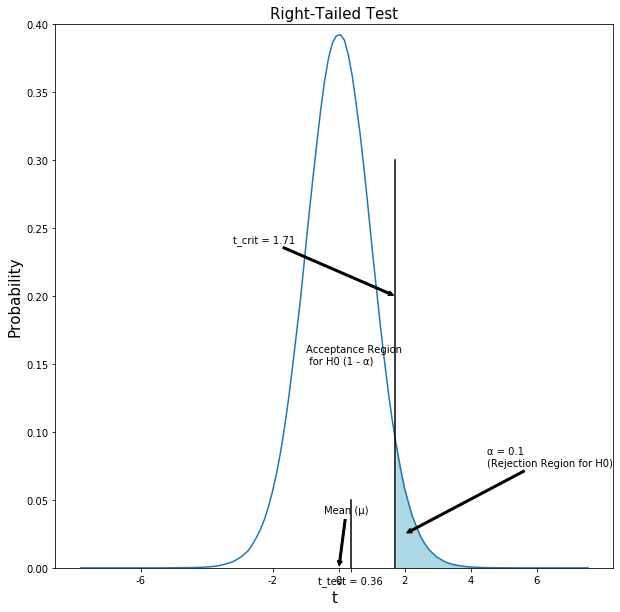

In [166]:
# consider a random variable 'X' that follows a t-distribution with 23 degrees of freedom
# pass the degrees of freedom to the parameter, 'df'
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.t.rvs(df = n - 1, size = 2000000, random_state = 20)

# plot the distribution of X
# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.4)

# use 'stats.t.isf()' to find the t-value for alpha = 0.1
# pass the value of 'alpha' to the parameter 'q'
# pass the degrees of freedom to the parameter, 'df' 
t = stats.t.isf(q = alpha, df = n-1)

# as t distribution is symmetric, for a left-tailed test draw a line at -(t-value)
# plot a vertical line at -(t-value) 
x, y = [t, t], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at test statistic value
x, y = [t_stat, t_stat], [0, 0.05]
plt.plot(x, y, color = 'black')

# add the color to the left of the t-value
# get the data for x and y axes for the distribution plot
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are less than -(t-value)
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= t], y1[x1 >= t], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'Mean (μ)', xy = (0, 0), xytext = (-0.45, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α = 0.1\n(Rejection Region for H0)', xy = (2, 0.025), xytext = (4.5, 0.075), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 't_crit = '+ str(round(t,2)), xy = (t, 0.2), xytext = (-t-1.5, 0.24), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -1, y = 0.15, s = 'Acceptance Region \n for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-6, -2, 0, 2, 4, 6, round(t_stat,2)], 
           labels = [-6, -2, 0, 2, 4, 6, 't_test = '+str(round(t_stat,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('t', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Right-Tailed Test', fontsize = 15)

# display the plot
plt.show()

## Two-Sample Unpaired t Test

### Check whether the units of Personal Care products sold online is different than the units of Personal Care products sold offline

In [167]:
# State Null and Alternate Hypothesis

print('Ho : Units sold online = Units sold offline')
print('Ha : Units sold online != Units sold offline')
print('Two Tailed Test')

#Decide Significance level

alpha = 0.05

#Check normality of data

online = data[(data['Sales_Channel'] == 'Online') & (data['Item_Type'] == 'Personal Care')]['Units_Sold']
offline = data[(data['Sales_Channel'] == 'Offline') & (data['Item_Type'] == 'Personal Care')]['Units_Sold']

stat_m, p_value_m = shapiro(online)

print('P-Value for online sales:', p_value_m)

stat_a, p_value_a = shapiro(offline)

print('P-Value for offline sales:', p_value_a)

Ho : Units sold online = Units sold offline
Ha : Units sold online != Units sold offline
Two Tailed Test
P-Value for online sales: 0.449716717004776
P-Value for offline sales: 0.0033281263895332813


In [168]:
print('p value for online sales is greater than 0.05, hence the data is normally distributed')
print('p value for offline sales is less than 0.05, hence the data is not normally distributed')
print('Since one sample is normally distributed and the other is not, we will use a Mann-Whitneyu Test')

# Compute the test statistic and corresponding p-value
test_stat, p_value = stats.mannwhitneyu(online, offline, alternative = 'two-sided')

print('Test statistic:', test_stat)
print('p-value:', p_value)
print('Since p value is greater than 0.05 , we fail to reject the null hypothesis')
print('We conclude that Units of Personal care products sold online are the same as the units sold offline')

p value for online sales is greater than 0.05, hence the data is normally distributed
p value for offline sales is less than 0.05, hence the data is not normally distributed
Since one sample is normally distributed and the other is not, we will use a Mann-Whitneyu Test
Test statistic: 993.0
p-value: 0.6866019901563465
Since p value is greater than 0.05 , we fail to reject the null hypothesis
We conclude that Units of Personal care products sold online are the same as the units sold offline


## Z Proportion Test for Two-Sample

### The manager of Walmart Asia claims that the proportion of online sales in their outlet is more than that of Walmart Europe online sales. Test the managers claim with 95% confidence.

In [169]:
# State Null and Alternate Hypothesis

print('Ho : mu_diff <= 0')
print('Ha : mu_diff > 0')
print('Right Tailed Test')

# Decide Significance level

alpha = 0.05

# Compute Z statistic

n_asia = data[data['Region'] == 'Asia']['Order_ID'].count()
n_europe = data[data['Region'] == 'Europe']['Order_ID'].count()
x_asia = data[(data['Sales_Channel'] == 'Online') & (data['Region'] == 'Asia')]['Order_ID'].count()
x_europe = data[(data['Sales_Channel'] == 'Online') & (data['Region'] == 'Europe')]['Order_ID'].count()

z_stat, p_val = sm.stats.proportions_ztest(count = np.array([x_asia,x_europe]), nobs = np.array([n_asia, n_europe]),alternative = 'larger')

print('Test statistic:', abs(z_stat))
print('P value: ',p_val)

# Calulcate Z-critical

z_crit = np.abs(round(stats.norm.isf(alpha), 2))

print('Critical value for two-tailed Z-test:', z_crit)
print('Since the p value is greater than 0.05 and z statistic is less than z critical , we fail to reject the null hypothesis')
print('We can conclude that the managers claim is incorrect with 95%')


Ho : mu_diff <= 0
Ha : mu_diff > 0
Right Tailed Test
Test statistic: 0.03294021016594039
P value:  0.5131388664467342
Critical value for two-tailed Z-test: 1.64
Since the p value is greater than 0.05 and z statistic is less than z critical , we fail to reject the null hypothesis
We can conclude that the managers claim is incorrect with 95%


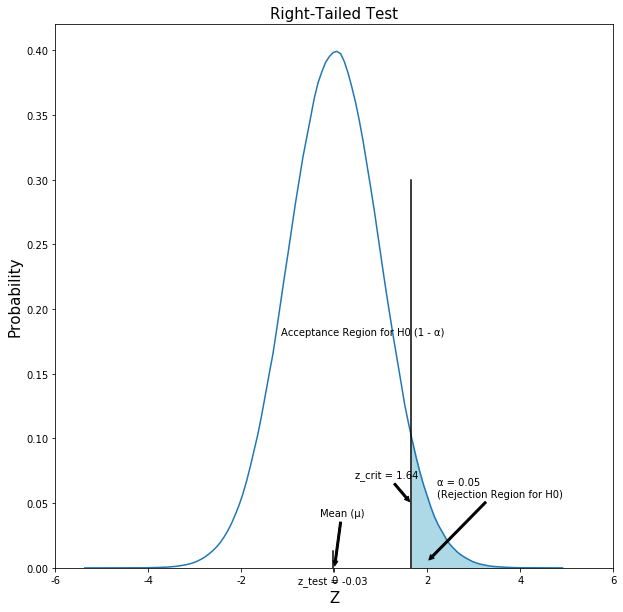

In [170]:
# consider a random variable 'X' that follows a standard normal distribution 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.norm.rvs(size = 2000000, random_state = 10)

# plot the distribution of X
# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.42)

# use 'stats.norm.isf()' to calculate the critical z-value for alpha = 0.1
# pass the value of 'alpha/2' to the parameter 'q' for a two-tailed test
z = stats.norm.isf(q = alpha)

# plot a vertical line at z-value
x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at z-test value
x, y = [z_stat, z_stat], [0, 0.013]
plt.plot(x, y, color = 'black')

# add the color to the right of the z-value and left of -(z-value)
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical z-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'Mean (μ)', xy = (0, 0), xytext = (-0.32, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (2, 0.005), xytext = (2.2, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0.05), xytext = (z-1.2, 0.07), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -1.15, y = 0.18, s = 'Acceptance Region for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-6, -4, -2, 0, 2, 4, 6, round(z_stat,2)], 
           labels = [-6, -4, -2, 0, 2, 4, 6, 'z_test = '+str(round(z_stat,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Right-Tailed Test', fontsize = 15)

# display the plot
plt.show()